In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify # for tree maps
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 
nltk.download('punkt')
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
import pickle
import os


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Djordje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Djordje\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Djordje\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Djordje\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
news_df = pd.read_json('dataset/News_Category_Dataset_v3.json', lines=True)

Shape of data

In [3]:
print(f"Total {news_df.shape[0]} rows and {news_df.shape[1]} columns")
np.random.seed(1) # get same random results every time
news_df.sample(n=20)

Total 209527 rows and 6 columns


link  \
161038  https://www.huffingtonpost.comhttp://www.nytim...   
24711   https://www.huffingtonpost.com/entry/aung-san-...   
54649   https://www.huffingtonpost.com/entry/calls-to-...   
199823  https://www.huffingtonpost.com/entry/fico-8-co...   
19088   https://www.huffingtonpost.com/entry/18-year-o...   
102059  https://www.huffingtonpost.com/entry/navient-m...   
112898  https://www.huffingtonpost.com/entry/democrati...   
84336   https://www.huffingtonpost.com/entry/donald-tr...   
121180  https://www.huffingtonpost.com/entry/going-the...   
7351    https://www.huffpost.com/entry/police-would-be...   
119270  https://www.huffingtonpost.com/entry/how-we-ca...   
33789   https://www.huffingtonpost.com/entry/trumo-lgb...   
164074  https://www.huffingtonpost.com/entry/quoting-f...   
155995  https://www.huffingtonpost.com/entry/brain-alc...   
124129  https://www.huffingtonpost.com/entry/whos-the-...   
156773  https://www.huffingtonpost.com/entry/dementia-...   
19224   https://www.huffingtonpost.com/entry/trump-mic...   
66338   https://www.huffingtonpost.com/entry/johnny-de...   
27948   https://www.huffingtonpost.com/entry/news-roun...   
115541  https://www.huffingtonpost.com/entry/mitch-mcc...   

                                                 headline       category  \
161038  As Pay Cards Replace Paychecks, Bank Fees Hurt...       BUSINESS   
24711   Aung San Suu Kyi's Speech On The Rohingya Cris...     WORLD NEWS   
54649   Calls To Decriminalize Sex Work Are Growing Lo...  THE WORLDPOST   
199823  FICO 8, Not FICO, Is Used In Recent Credit Com...          MONEY   
19088   18-Year-Old Confesses To Molesting 'Upwards Of...          CRIME   
102059  Education Department Nears Deal With Student L...       POLITICS   
112898  Democratic Lawyer Crafted Deal That Would Obli...       POLITICS   
84336   Anderson Cooper Calls Out Trump For Changing H...          MEDIA   
121180   Going the Distance in the Entertainment Industry           ARTS   
7351    Would-Be Bank Robber Rips Up Note After Gettin...     WEIRD NEWS   
119270                       How We Can Help the Homeless         IMPACT   
33789           Trump Remains Silent On LGBTQ Pride Month   QUEER VOICES   
164074  Ronda (and Gibraltor) --Two Friends in Andalus...         TRAVEL   
155995  Chronic Alcohol Exposure Affects Behavior Cont...       WELLNESS   
124129                 Who's the Old Guy at Lollapalooza?         COMEDY   
156773  Ethics of Care: Guiding the Treatment of Demen...       WELLNESS   
19224   Trump White House Furiously Tries To Distance ...       POLITICS   
66338   Johnny Depp Doesn’t Want His ‘Short Marriage’ ...  ENTERTAINMENT   
27948                    News Roundup for August 10, 2017       POLITICS   
115541  Mitch McConnell's Hollow Promise Not To Shut D...       POLITICS   

                                        short_description  \
161038  A growing number of American workers are confr...   
24711   Imagine there were an ongoing humanitarian cri...   
54649   As South Africa’s government debates whether o...   
199823  And the credit industry is not helping their o...   
19088   Joseph Hayden Boston said he was 10 years old ...   
102059                                                      
112898                                                      
84336   Trump went from a positive review to saying Co...   
121180  Whatever you accomplish in this business will ...   
7351    Bank employees pieced together the note, which...   
119270  Although I showed her kindness and respect, I ...   
33789   Deafening silence from the supposed “most gay-...   
164074  After arriving in Ronda, we walked to the Hote...   
155995  Recently, a Centers for Disease Control and Pr...   
124129  As the Chicago skyline shone directly to my we...   
156773  This is a much different type of caregiving th...   
19224   They are trying to shift the blame to Obama. S...   
66338   Amber Heard filed for divorce on Monday, reque...   
27948   Consume

In [4]:
news_df.info()
news_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


date
count                         209527
mean   2015-04-30 00:44:14.344308736
min              2012-01-28 00:00:00
25%              2013-08-10 00:00:00
50%              2015-03-16 00:00:00
75%              2016-11-01 00:00:00
max              2022-09-23 00:00:00

In [5]:
news_df.nunique()

link                 209486
headline             207996
category                 42
short_description    187022
authors               29169
date                   3890
dtype: int64

In [6]:
duplicated_rows = news_df[news_df.duplicated()]
duplicated_rows.shape

(13, 6)

Clean up duplicates

In [7]:
news_df = news_df.drop_duplicates()

new_shape = news_df.shape
new_shape


(209514, 6)

Checking for null values

In [8]:
news_df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [9]:
news_df.replace('', np.nan, inplace=True)

missing_values = news_df.isnull().sum()
print(missing_values)

link                     0
headline                 6
category                 0
short_description    19712
authors              37405
date                     0
dtype: int64


Replace missing 'authors' with 'Unknown'.
Drop rows where either 'short_description' or 'headline' is missing.

In [10]:
news_df['authors'].fillna('Unknown', inplace=True)

news_df.dropna(subset=['short_description', 'headline'], inplace=True)

missing_values_after = news_df.isnull().sum()
print(missing_values_after)

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


Checking category values

In [11]:
# Display all unique values in the 'category' field
unique_categories = news_df['category'].unique()
print("Unique Categories (Original):", unique_categories)
print("Unique Categories Sum",news_df['category'].nunique())

# Normalize the text to lowercase and find unique values again
normalized_categories = news_df['category'].str.lower().unique()
print("Unique Categories (Normalized):", normalized_categories)

# Find categories that have different text transformations
differences = set(unique_categories) - set(normalized_categories)
print("Categories with Different Text Transformations:", differences)

Unique Categories (Original): ['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']
Unique Categories Sum 42
Unique Categories (Normalized): ['u.s. news' 'comedy' 'parenting' 'world news' 'culture & arts' 'tech'
 'sports' 'entertainment' 'politics' 'weird news' 'environment'
 'education' 'crime' 'science' 'wellness' 'business' 'style & beauty'
 'food & drink' 'media' 'queer voices' 'home & living' 'women'
 'black voices' 'travel' 'money' 'religion' 'latino voices' 'impact'
 'weddings' 'college' 'parents' 'arts & culture' 'style' 'green' 'taste'
 'health

 Since the number of unique categories didn't change after normalization, it suggests that there were no duplicate categories that differed only by text case.

 But there are some categories that are very similar to each other. 
 We can merge them into one category.


Convert categories name into numerical index

In [12]:
def df_category_label_encoding(df):
    df['categoryId'] = df['category'].factorize()[0]
    return news_df

In [13]:
news_df = df_category_label_encoding(news_df)
news_df.head()
category_with_id = (news_df[['category', 'categoryId']]
                    .drop_duplicates()
                    .sort_values('categoryId'))
print(category_with_id)

              category  categoryId
0            U.S. NEWS           0
2               COMEDY           1
3            PARENTING           2
7           WORLD NEWS           3
8       CULTURE & ARTS           4
13                TECH           5
17              SPORTS           6
20       ENTERTAINMENT           7
21            POLITICS           8
29          WEIRD NEWS           9
32         ENVIRONMENT          10
94           EDUCATION          11
107              CRIME          12
114            SCIENCE          13
134           WELLNESS          14
162           BUSINESS          15
260     STYLE & BEAUTY          16
280       FOOD & DRINK          17
319              MEDIA          18
340       QUEER VOICES          19
394      HOME & LIVING          20
439              WOMEN          21
455       BLACK VOICES          22
892             TRAVEL          23
1796             MONEY          24
1861          RELIGION          25
2880     LATINO VOICES          26
3834            IMPA

Function to display category distribution

In [14]:
def display_category_distribution(df):
    # Set the figure size to make the plot wider
    plt.figure(figsize=(20, 8))
    
    # Create the bar plot with different colors
    (df.groupby('category')
     ['categoryId']
     .value_counts()
     .sort_values(ascending=False)
     .plot(kind="bar", color=plt.cm.Paired(np.arange(42))))
    
    # Set the title and labels with increased font size
    plt.title("Visualize Numbers of Category of Data", fontsize=16)
    plt.xlabel("Category of Data", fontsize=14)
    plt.ylabel("Count", fontsize=14)

Display category distribution before merging similar categories

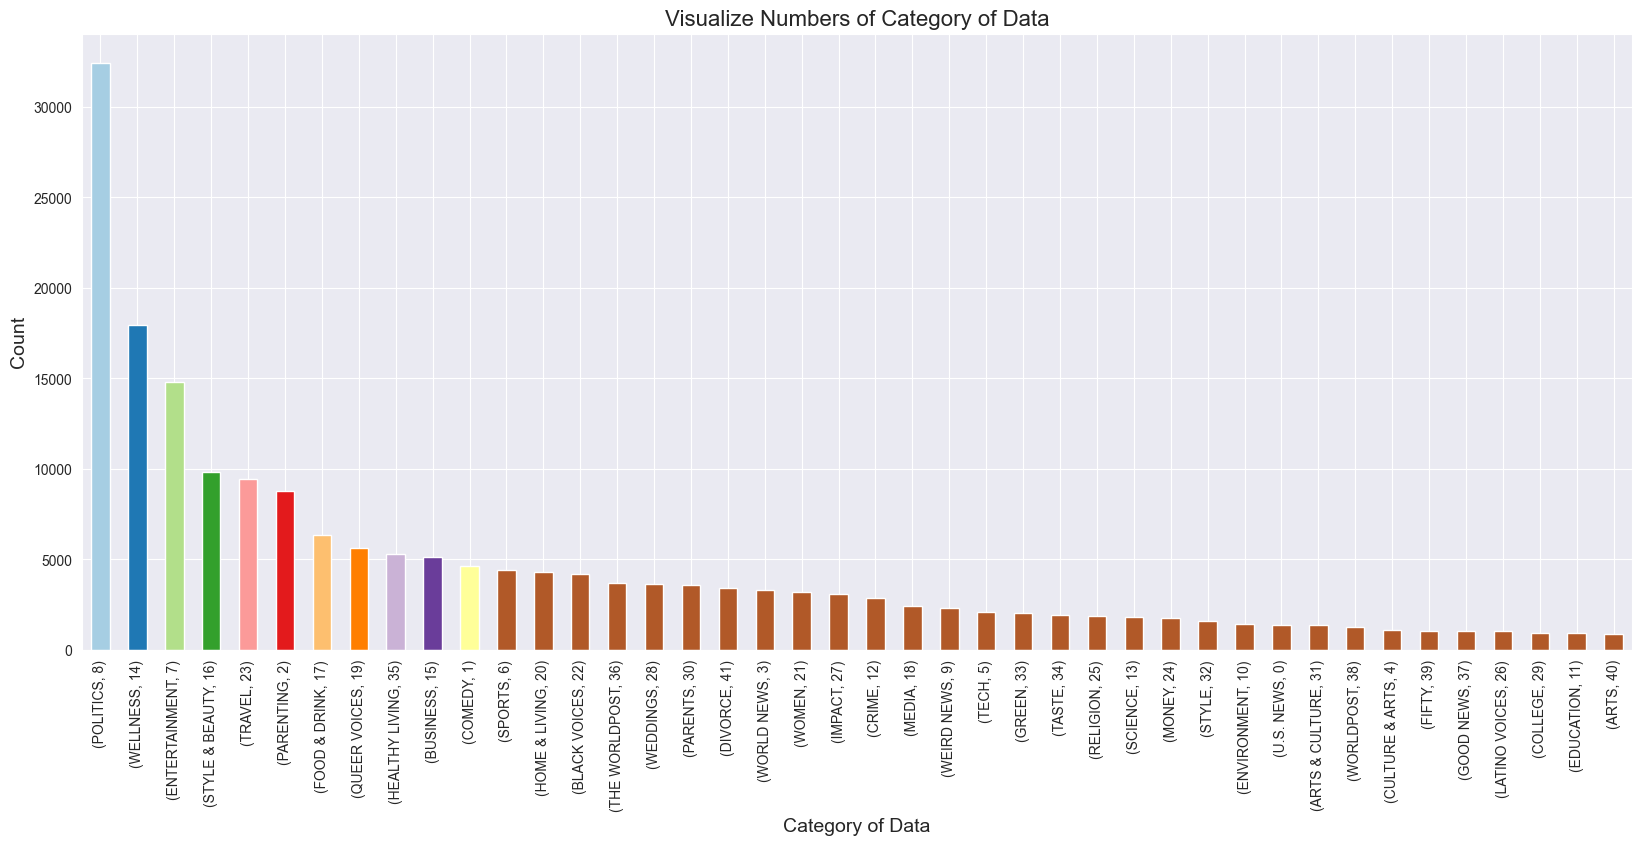

In [15]:
display_category_distribution(news_df)

Show certain categories values

In [16]:
def filter_by_category(df, category_name):
    filtered_df = df.loc[df['category'] == category_name]
    return filtered_df

Merge similar categories

In [17]:
news_df['category'].value_counts()

category
POLITICS          32440
WELLNESS          17940
ENTERTAINMENT     14774
STYLE & BEAUTY     9799
TRAVEL             9421
PARENTING          8790
FOOD & DRINK       6331
QUEER VOICES       5603
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
BLACK VOICES       4177
THE WORLDPOST      3664
WEDDINGS           3653
PARENTS            3556
DIVORCE            3426
WORLD NEWS         3297
WOMEN              3183
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2099
GREEN              2046
TASTE              1940
RELIGION           1878
SCIENCE            1803
MONEY              1755
STYLE              1567
ENVIRONMENT        1441
U.S. NEWS          1377
ARTS & CULTURE     1339
WORLDPOST          1242
CULTURE & ARTS     1063
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
COLLEGE             921
EDUCATION           902
ARTS   

In [18]:
def apply_mapping(category,mappings):
    for old_category, new_category in mappings:
        if category == old_category:
            return new_category
    return category

def merge_similar_categories(df, mappings):
    df['category'] = df['category'].apply(lambda x: apply_mapping(x, mappings))
    return df

In [19]:
same_categories_mappings = [
    ('THE WORLDPOST', 'WORLDPOST'),
    ('CULTURE & ARTS', 'ARTS & CULTURE'),
    ('ARTS', 'ARTS & CULTURE')
]

In [20]:
news_df = merge_similar_categories(news_df.copy(), same_categories_mappings)

In [21]:
filter_by_category(news_df, 'WORLDPOST')

link  \
22902   https://www.huffingtonpost.com/entry/north-kor...   
23954   https://www.huffingtonpost.com/entry/weekend-r...   
23979   https://www.huffingtonpost.com/entry/eu-france...   
24046   https://www.huffingtonpost.com/entry/macron-me...   
24460   https://www.huffingtonpost.com/entry/weekend-r...   
...                                                   ...   
133493  https://www.huffingtonpost.com/entry/cubas-cul...   
133533  https://www.huffingtonpost.com/entry/is-justic...   
133591  https://www.huffingtonpost.com/entry/assad-and...   
133617  https://www.huffingtonpost.com/entry/men-must-...   
133642  https://www.huffingtonpost.com/entry/gabriel-g...   

                                                 headline   category  \
22902   It's Too Late To Stop North Korea As A Nuclear...  WORLDPOST   
23954              Weekend Roundup: The Battle For Europe  WORLDPOST   
23979   The Fate Of Europe Rests On The French-German ...  WORLDPOST   
24046   After Merkel's Victory, Macron Sets Sights On ...  WORLDPOST   
24460   Weekend Roundup: Trump's U.N. Speech Marks The...  WORLDPOST   
...                                                   ...        ...   
133493     Cuba's Culture of Violence: A Dangerous Spiral  WORLDPOST   
133533     Is Justice Possible for North Korea's Victims?  WORLDPOST   
133591           Assad and His Friends Brag About Winning  WORLDPOST   
133617  Men Must Play Their Part in the Battle for Ara...  WORLDPOST   
133642                                        Adios, Gabo  WORLDPOST   

                                        short_description  \
22902   The window to roll back Pyongyang's weapons pr...   
23954   Wary German voters and Catalan separatists are...   
23979   Macron and Merkel must figure out a common way...   
24046   France’s transformation under Macron will push...   
24460   We are leaving the postwar era that saw the U....   
...                                                   ...   
133493  A woman hits a child, who appears to be her so...   
133533  What to do about torture, rape, political pris...   
133591  The Obama administration's entire Syria policy...   
133617  The culture that marginalizes women is largely...   
133642  When a friend dies, you are left with deep pai...   

                                                  authors       date  \
22902   Cui Lei, ContributorResearch fellow, China Ins... 2017-10-13   
23954   Nathan Gardels, ContributorEditor-in-chief, Th... 2017-09-29   
23979   Sébastien Maillard, ContributorDirector, Jacqu... 2017-09-29   
24046   Sylvie Goulard, ContributorFormer French defen... 2017-09-28   
24460   Nathan Gardels, ContributorEditor-in-chief, Th... 2017-09-23   
...                                                   ...        ...   
133493  Yoani Sanchez, ContributorPublisher of 14ymedi... 2014-04-20   
133533  Evelyn Leopold, ContributorVeteran journalist ... 2014-04-19   
133591  Daniel R. DePetris, ContributorNational Securi... 2014-04-18   
133617  Ziad J. Asali, M.D., ContributorPresident, Ame... 2014-04-18   
133642  Sergio Muñoz Bata, ContributorSyndicated Latin... 2014-04-18   

        categoryId  
22902           36  
23954           36  
23979           36  
24046           36  
24460           36  
...            ...  
133493          38  
133533          38  
133591          38  
133617          38  
133642          38  

[4906 rows x 7 columns]

In [22]:
filter_by_category(news_df, 'WORLD NEWS')

link  \
7      https://www.huffpost.com/entry/puerto-rico-wat...   
9      https://www.huffpost.com/entry/biden-un-russia...   
10     https://www.huffpost.com/entry/bc-soc-wcup-cap...   
11     https://www.huffpost.com/entry/man-sets-fire-p...   
12     https://www.huffpost.com/entry/fiona-threatens...   
...                                                  ...   
34704  https://www.huffingtonpost.com/entry/the-riyad...   
34713  https://www.huffingtonpost.com/entry/donald-of...   
34721  https://www.huffingtonpost.com/entry/resistanc...   
34783  https://www.huffingtonpost.com/entry/turning-t...   
38431  https://www.huffingtonpost.com/entry/north-kor...   

                                                headline    category  \
7      Puerto Ricans Desperate For Water After Hurric...  WORLD NEWS   
9      Biden At UN To Call Russian War An Affront To ...  WORLD NEWS   
10     World Cup Captains Want To Wear Rainbow Armban...  WORLD NEWS   
11     Man Sets Himself On Fire In Apparent Protest O...  WORLD NEWS   
12     Fiona Threatens To Become Category 4 Storm Hea...  WORLD NEWS   
...                                                  ...         ...   
34704  The Riyadh Summits: A Workshop For A Global Fr...  WORLD NEWS   
34713                                   Donald Of Arabia  WORLD NEWS   
34721  Resistance Grows Against Hungarian Government'...  WORLD NEWS   
34783  Trump’s Counter-Extremism Effort Should Addres...  WORLD NEWS   
38431  What You Need To Know About North Korea's Nucl...  WORLD NEWS   

                                       short_description  \
7      More than half a million people remained witho...   
9      White House officials say the crux of the pres...   
10     FIFA has come under pressure from several Euro...   
11     The incident underscores a growing wave of pro...   
12     Hurricane Fiona lashed the Turks and Caicos Is...   
...                                                  ...   
34704  Donald Trump’s presidency is currently undergo...   
34713  If Trump continues on this path, the future is...   
34721  Budapest is seeing its largest anti-government...   
34783  The president will have to address incitement ...   
38431  Experts say the country's nuclear weapons test...   

                                                 authors       date  \
7                                        DÁNICA COTO, AP 2022-09-22   
9                                      Aamer Madhani, AP 2022-09-21   
10                                     GRAHAM DUNBAR, AP 2022-09-21   
11                                    Mari Yamaguchi, AP 2022-09-21   
12                                       Dánica Coto, AP 2022-09-21   
...                                                  ...        ...   
34704  Raghida Dergham, ContributorFounder and Execut... 2017-05-21   
34713  Hossein Askari, ContributorProfessor of Busine... 2017-05-21   
34721  Brian Dooley, ContributorSenior Advisor, Human... 2017-05-21   
34783  David Andrew Weinberg, ContributorAnti-Defamat... 2017-05-20   
38431                      Nick Visser and Jesselyn Cook 2017-04-09   

       categoryId  
7               3  
9               3  
10              3  
11              3  
12              3  
...           ...  
34704           3  
34713           3  
34721           3  
34783           3  
38431           3  

[3297 rows x 7 columns]

In [23]:
filter_by_category(news_df, 'COLLEGE')

link  \
14783   https://www.huffingtonpost.com/entry/cornell-f...   
17323   https://www.huffingtonpost.com/entry/norman-pa...   
18529   https://www.huffingtonpost.com/entry/norman-pa...   
21887   https://www.huffingtonpost.com/entry/when-ice-...   
22375   https://www.huffingtonpost.com/entry/as-colleg...   
...                                                   ...   
133260  https://www.huffingtonpost.com/entry/student-a...   
133263  https://www.huffingtonpost.com/entry/taking-ba...   
133355  https://www.huffingtonpost.com/entry/the-more-...   
133384  https://www.huffingtonpost.com/entry/student-a...   
133517  https://www.huffingtonpost.com/entry/bowdoins-...   

                                                 headline category  \
14783   Cornell Frat's 'Pig Roast' Gave Points For Sex...  COLLEGE   
17323   Norm Pattiz, Accused Of Sexual Harassment, To ...  COLLEGE   
18529   Radio Mogul Under Pressure To Resign From Powe...  COLLEGE   
21887            When ICE Comes Calling In The Ivy League  COLLEGE   
22375   As College Costs Rise, Congress Must Save The ...  COLLEGE   
...                                                   ...      ...   
133260  Student Athletes or Employees: The Debate in P...  COLLEGE   
133263                  Taking Back Ownership of Our Food  COLLEGE   
133355              The More You Pay, the More It's Worth  COLLEGE   
133384  Student Athletes or Employees: The Debate in P...  COLLEGE   
133517                             Bowdoin's Double Bogey  COLLEGE   

                                        short_description  \
14783           Zeta Beta Tau was slapped with probation.   
17323   The media executive submitted his resignation ...   
18529   Several women have accused Norman Pattiz of se...   
21887                                     We must resist.   
22375   In today’s highly competitive global economy, ...   
...                                                   ...   
133260  What we need is truth in packaging and promoti...   
133263  Let's grow our own food, and build communities...   
133355  Those lists are what stick with readers, even ...   
133384  We want to believe that when we are watching c...   
133517  This is American higher education today: an an...   

                                                  authors       date  \
14783                                          Ron Dicker 2018-02-07   
17323                                      Carla Herreria 2017-12-29   
18529                                         Matt Ferner 2017-12-11   
21887   Center for Community Change Action, Contributo... 2017-10-26   
22375   Rep. Terri Sewell, ContributorRep. Terri A. Se... 2017-10-20   
...                                                   ...        ...   
133260             Frank Islam and Ed Crego, Contributors 2014-04-23   
133263  Ophir Haberer, ContributorSenior at Tulane Uni... 2014-04-22   
133355  Dr. David Svaldi, ContributorPresident, Adams ... 2014-04-21   
133384             Frank Islam and Ed Crego, Contributors 2014-04-21   
133517  Peter W. Wood, ContributorPresident of the Nat... 2014-04-19   

        categoryId  
14783           29  
17323           29  
18529           29  
21887           29  
22375           29  
...            ...  
133260          29  
133263          29  
133355          29  
133384          29  
133517          29  

[921 rows x 7 columns]

In [24]:
filter_by_category(news_df, 'EDUCATION')

link  \
94      https://www.huffpost.com/entry/ap-us-los-angel...   
183     https://www.huffpost.com/entry/united-states-m...   
764     https://www.huffpost.com/entry/parents-schools...   
1890    https://www.huffpost.com/entry/nyc-teachers-st...   
1941    https://www.huffpost.com/entry/federal-judge-s...   
...                                                   ...   
133279  https://www.huffingtonpost.com/entry/thinking-...   
133334  https://www.huffingtonpost.com/entry/what-to-d...   
133337  https://www.huffingtonpost.com/entry/californi...   
133496  https://www.huffingtonpost.com/entry/common-co...   
133638  https://www.huffingtonpost.com/entry/my-son-on...   

                                                 headline   category  \
94      Cyberattack Prompts Los Angeles School Distric...  EDUCATION   
183     Minneapolis Teacher Contract Race Language Ign...  EDUCATION   
764     Despite GOP Attacks, Parents Are Pretty Happy ...  EDUCATION   
1890    COVID Vaccine Mandate Takes Effect For NYC Tea...  EDUCATION   
1941    Federal Judge Suspends New York City's Vaccine...  EDUCATION   
...                                                   ...        ...   
133279                            Thinking Beyond the Box  EDUCATION   
133334                        Brainstorming Middle School  EDUCATION   
133337  Staunch Majority of California Voters Support ...  EDUCATION   
133496  Why Doesn't the New York Times Understand the ...  EDUCATION   
133638         My Son Only Read One Book in Middle School  EDUCATION   

                                        short_description  \
94      Such attacks have become a growing threat to U...   
183     When Minneapolis teachers settled a 14-day str...   
764     Increasing Republican attacks on the nation's ...   
1890    Unvaccinated employees will be placed on unpai...   
1941    But the district is confident that it will pre...   
...                                                   ...   
133279  Those of us who are staunch advocates of HBCUs...   
133334  If we want our children to help us preserve, s...   
133337  Through these proposals, we can provide every ...   
133496  How can the nation's "newspaper of record" be ...   
133638  Great reading can be done in middle school if ...   

                                                  authors       date  \
94        Stefanie Dazio, Frank Bajak and Zeke Miller, AP 2022-09-07   
183                                   Steve Karnowski, AP 2022-08-21   
764                                          Sara Boboltz 2022-04-30   
1890                                              Unknown 2021-10-04   
1941                                     Michael Hill, AP 2021-09-25   
...                                                   ...        ...   
133279  Charlie Nelms, Ed.D., ContributorHigher Educat... 2014-04-22   
133334  Allison Gaines Pell, ContributorHead of School... 2014-04-22   
133337      Deborah Kong, ContributorDirector, Early Edge 2014-04-22   
133496  Diane Ravitch, ContributorResearch Professor o... 2014-04-20   
133638                     Franchesca Warren, Contributor 2014-04-18   

        categoryId  
94              11  
183             11  
764             11  
1890            11  
1941            11  
...            ...  
133279          11  
133334          11  
133337          11  
133496          11  
133638          11  

[902 rows x 7 columns]

In [25]:
news_df['category'].nunique()

39

In [26]:
similar_categories_mappings = [
    ('WORLD NEWS','WORLDPOST')
]
news_df = merge_similar_categories(news_df.copy(), similar_categories_mappings)

Drop the rows that have under 1000 articles for category

In [27]:
def drop_by_category(df, category_name):
    df = df[df['category'] != category_name]
    return df

In [28]:
news_df = drop_by_category(news_df, 'COLLEGE')

In [29]:
news_df = drop_by_category(news_df, 'EDUCATION')

Display category distribution after merging similar categories

In [30]:
news_df.drop(['categoryId'], axis=1, inplace=True)
news_df = df_category_label_encoding(news_df)
news_df.head()
category_with_id = (news_df[['category', 'categoryId']]
                    .drop_duplicates()
                    .sort_values('categoryId'))
print(category_with_id)

              category  categoryId
0            U.S. NEWS           0
2               COMEDY           1
3            PARENTING           2
7            WORLDPOST           3
8       ARTS & CULTURE           4
13                TECH           5
17              SPORTS           6
20       ENTERTAINMENT           7
21            POLITICS           8
29          WEIRD NEWS           9
32         ENVIRONMENT          10
107              CRIME          11
114            SCIENCE          12
134           WELLNESS          13
162           BUSINESS          14
260     STYLE & BEAUTY          15
280       FOOD & DRINK          16
319              MEDIA          17
340       QUEER VOICES          18
394      HOME & LIVING          19
439              WOMEN          20
455       BLACK VOICES          21
892             TRAVEL          22
1796             MONEY          23
1861          RELIGION          24
2880     LATINO VOICES          25
3834            IMPACT          26
5928          WEDDIN

Explore category feature and see its distribution

In [31]:
news_df['category'].value_counts()

category
POLITICS          32440
WELLNESS          17940
ENTERTAINMENT     14774
STYLE & BEAUTY     9799
TRAVEL             9421
PARENTING          8790
WORLDPOST          8203
FOOD & DRINK       6331
QUEER VOICES       5603
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
BLACK VOICES       4177
WEDDINGS           3653
PARENTS            3556
DIVORCE            3426
ARTS & CULTURE     3265
WOMEN              3183
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2099
GREEN              2046
TASTE              1940
RELIGION           1878
SCIENCE            1803
MONEY              1755
STYLE              1567
ENVIRONMENT        1441
U.S. NEWS          1377
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
Name: count, dtype: int64

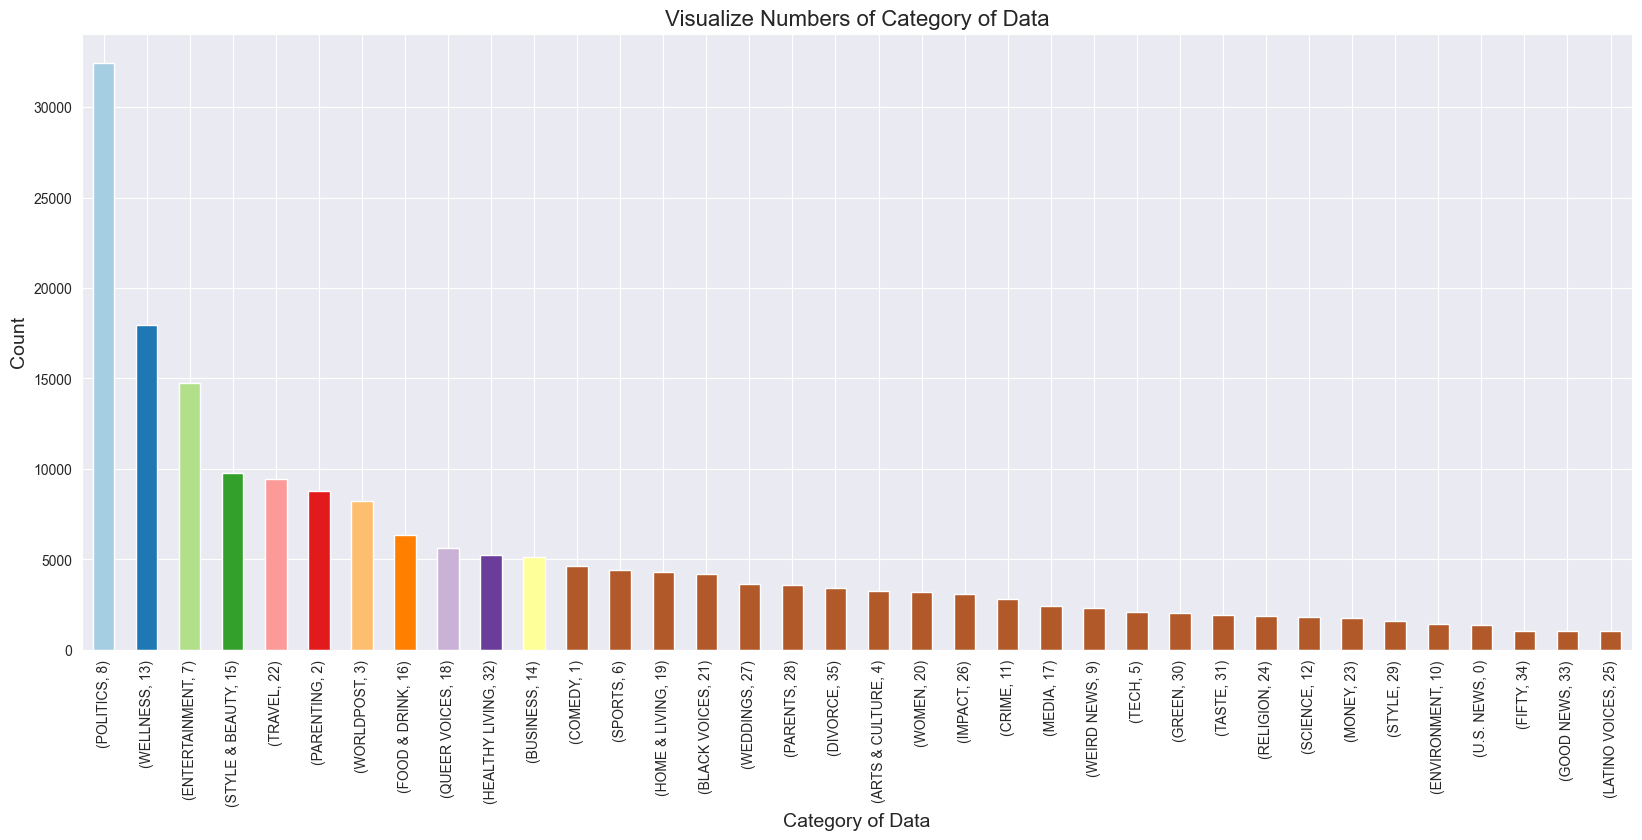

In [32]:
display_category_distribution(news_df)

We can se that is politics category has the largest amount of number of news articles, followed by wellness and entertainment.

The distribution plot shows a clear case of class imbalance, where categories like 'POLITICS', 'WELLNESS', and 'ENTERTAINMENT' have a significantly higher number of instances than categories like 'EDUCATION', 'CULTURE & ARTS', or 'LATINO VOICES'

Techniques to handle class imbalance:
1.Resampling (oversampling or undersampling)
2.Weighted Loss Functions(give more importance to the minority classes during training)
3.Data Augmentation(create additional, synthetic examples of minority classes)
4.Only to classifier the majority class and ignore the minority class(n samples)

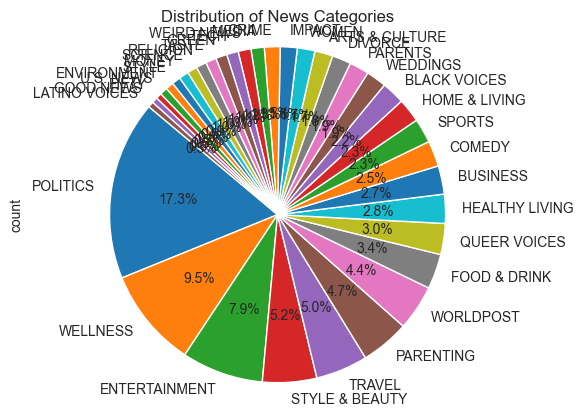

In [33]:
news_df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of News Categories')
plt.show()


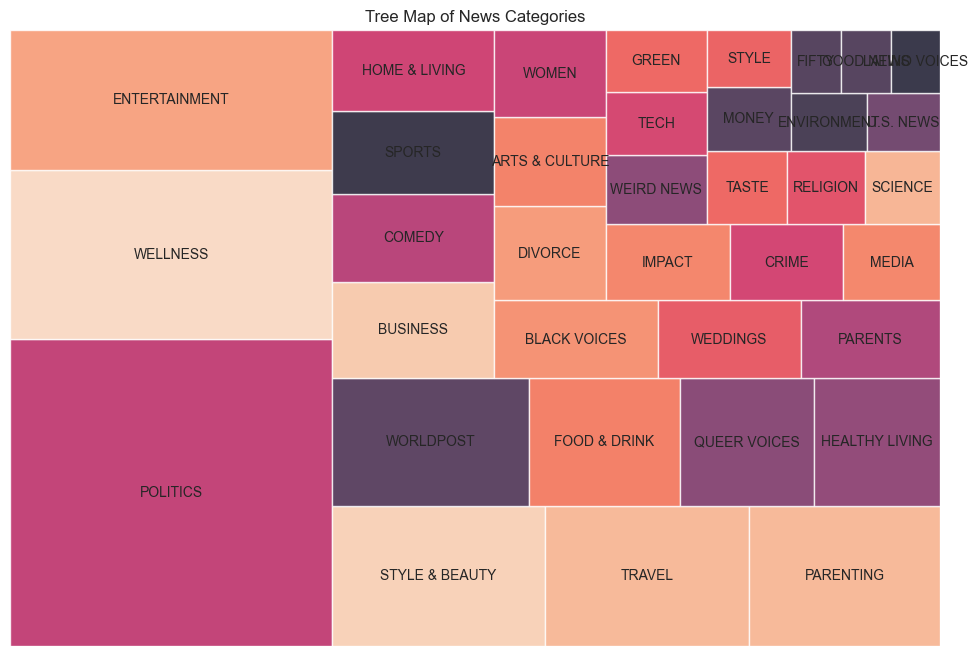

In [34]:
category_sizes = news_df['category'].value_counts()

# Create a Tree Map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=category_sizes, label=category_sizes.index, alpha=0.8)
plt.axis('off')  # Remove the axes
plt.title('Tree Map of News Categories')
plt.show()

Relationship between category and other features

In [35]:
def stats_for_feature(feature_name):
    stats_data = []
    
    # Calculate statistics for each category
    for category in news_df['category'].unique():
        category_data = news_df[news_df['category'] == category][feature_name]
        stats_data.append({
            'category': category,
            'min': category_data.min(),
            'max': category_data.max(),
            'mean': category_data.mean(),
            'median': category_data.median()
        })
    
    # Convert list of dictionaries to DataFrame
    stats_df = pd.DataFrame(stats_data)
    
    # Creating separate bar plots for each statistic
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(60, 20))
    fig.suptitle(f'{feature_name} Length Statistics by News Category')
    
    # Define the maximum y-axis value for each plot
    y_max_values = {
        'min': stats_df['min'].max(),
        'max': stats_df['max'].max(),
        'mean': stats_df['mean'].max(),
        'median': stats_df['median'].max()
    }

    # Min
    sns.barplot(ax=axes[0], x='category', y='min', data=stats_df)
    axes[0].set_title(f'Minimum {feature_name} Length')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_ylim(0, y_max_values['min'] + 10)  # Adjust y-axis limit

    # Max
    sns.barplot(ax=axes[1], x='category', y='max', data=stats_df)
    axes[1].set_title(f'Maximum {feature_name} Length')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_ylim(0, y_max_values['max'] + 10)

    # Mean
    sns.barplot(ax=axes[2], x='category', y='mean', data=stats_df)
    axes[2].set_title(f'Mean {feature_name} Length')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
    axes[2].set_ylim(0, y_max_values['mean'] + 10)

    # Median
    sns.barplot(ax=axes[3], x='category', y='median', data=stats_df)
    axes[3].set_title(f'Median {feature_name} Length')
    axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45)
    axes[3].set_ylim(0, y_max_values['median'] + 10)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust subplots to fit the figure area
    plt.show()

Relationship between category and headline length

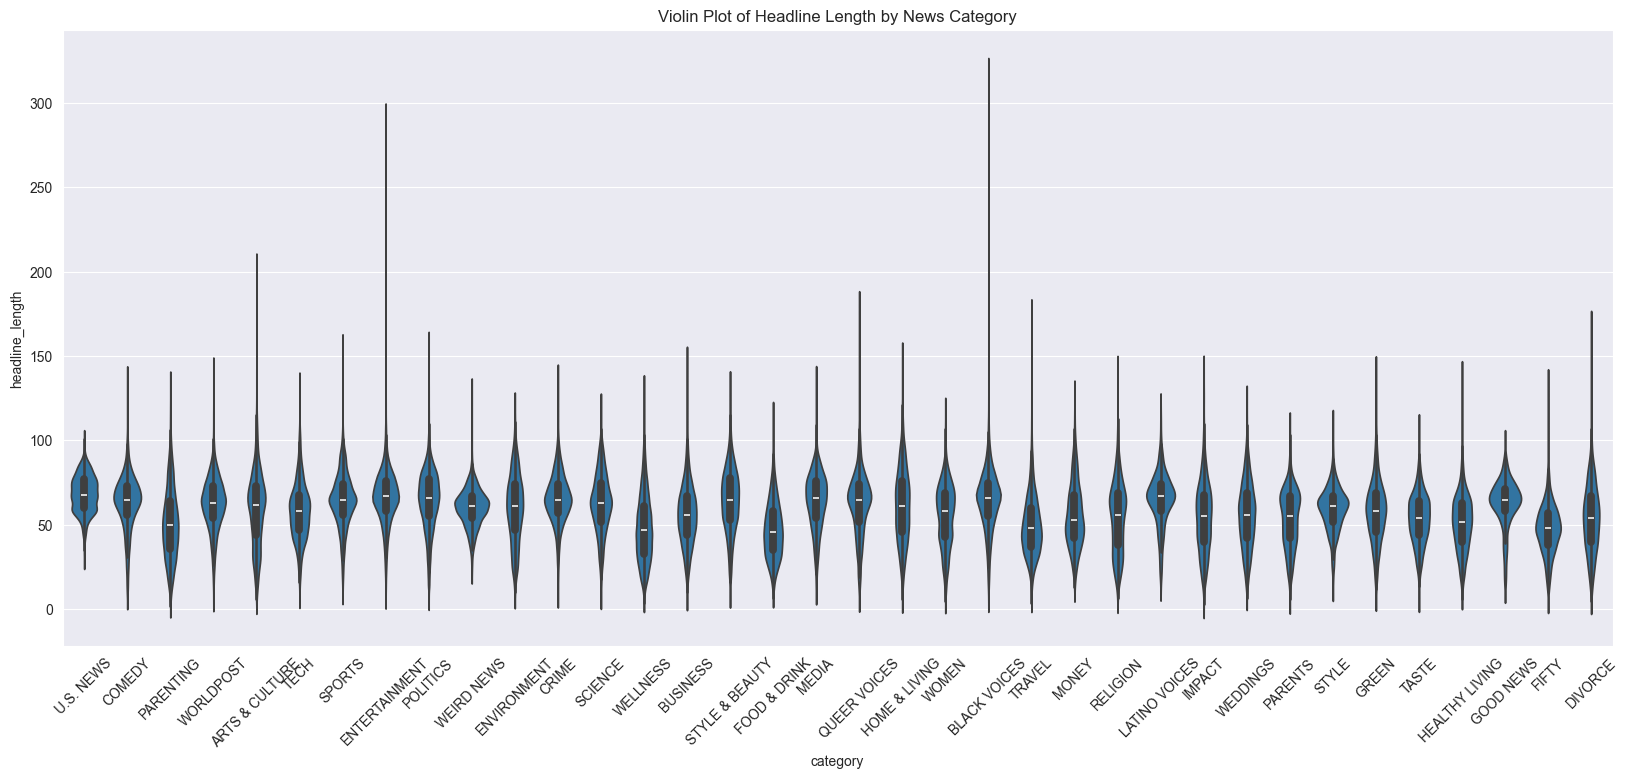

In [36]:
news_df['headline_length'] = news_df['headline'].str.len()

plt.figure(figsize=(20, 8))
sns.violinplot(x='category', y='headline_length', data=news_df)
plt.xticks(rotation=45)
plt.title('Violin Plot of Headline Length by News Category')
plt.show()

C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].

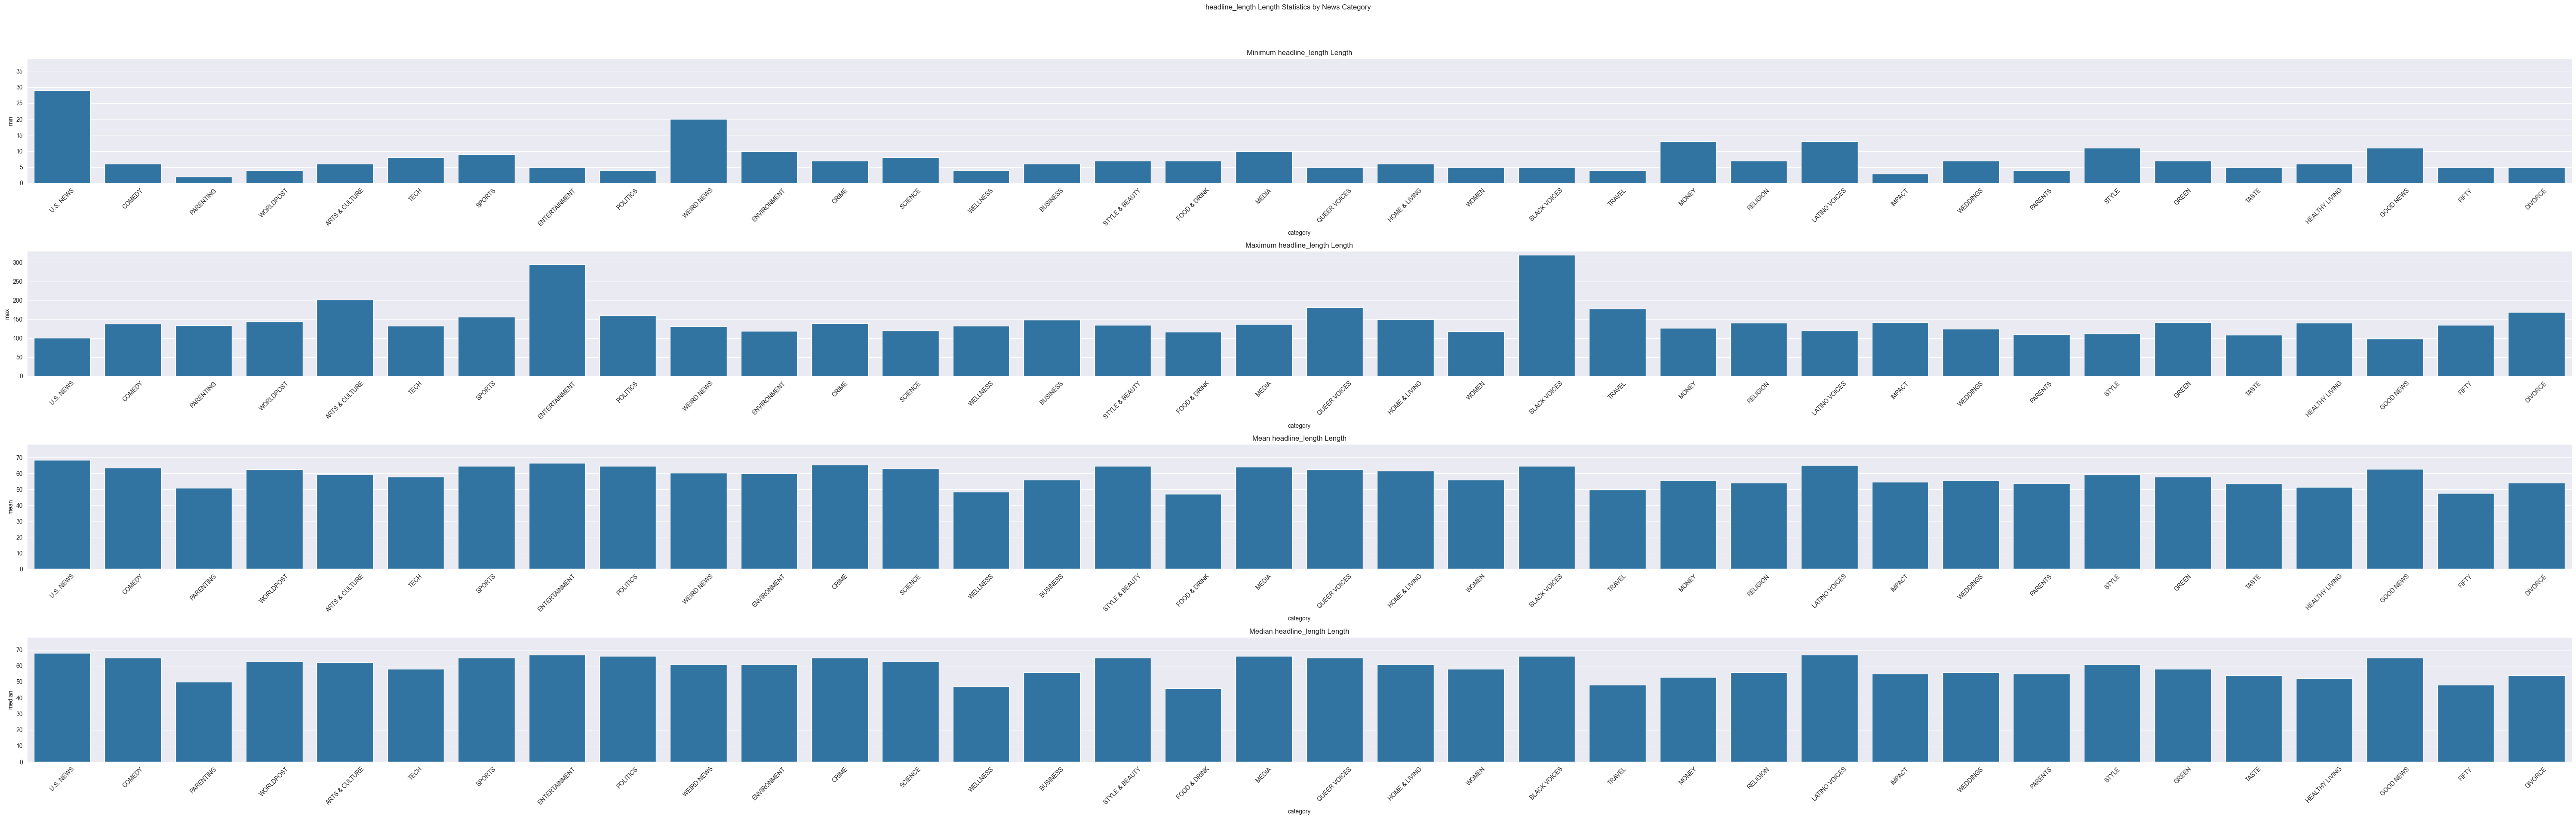

In [37]:
stats_for_feature('headline_length')

Relationship between category and short_description length

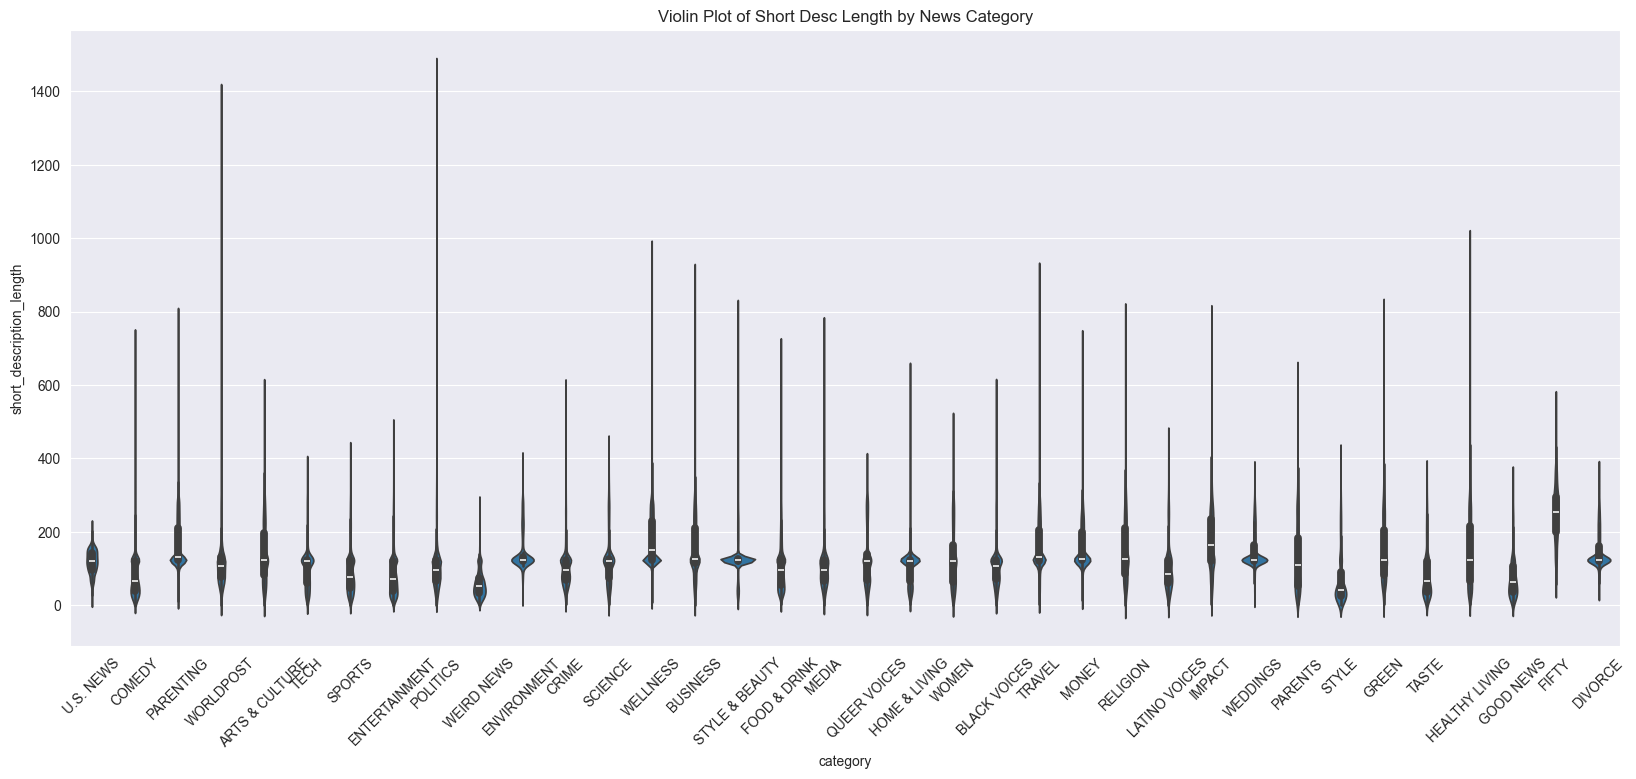

In [38]:
news_df['short_description_length'] = news_df['short_description'].str.len()

plt.figure(figsize=(20, 8))
sns.violinplot(x='category', y='short_description_length', data=news_df)
plt.xticks(rotation=45)
plt.title('Violin Plot of Short Desc Length by News Category')
plt.show()

C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
C:\Users\Djordje\AppData\Local\Temp\ipykernel_19136\3727178033.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].

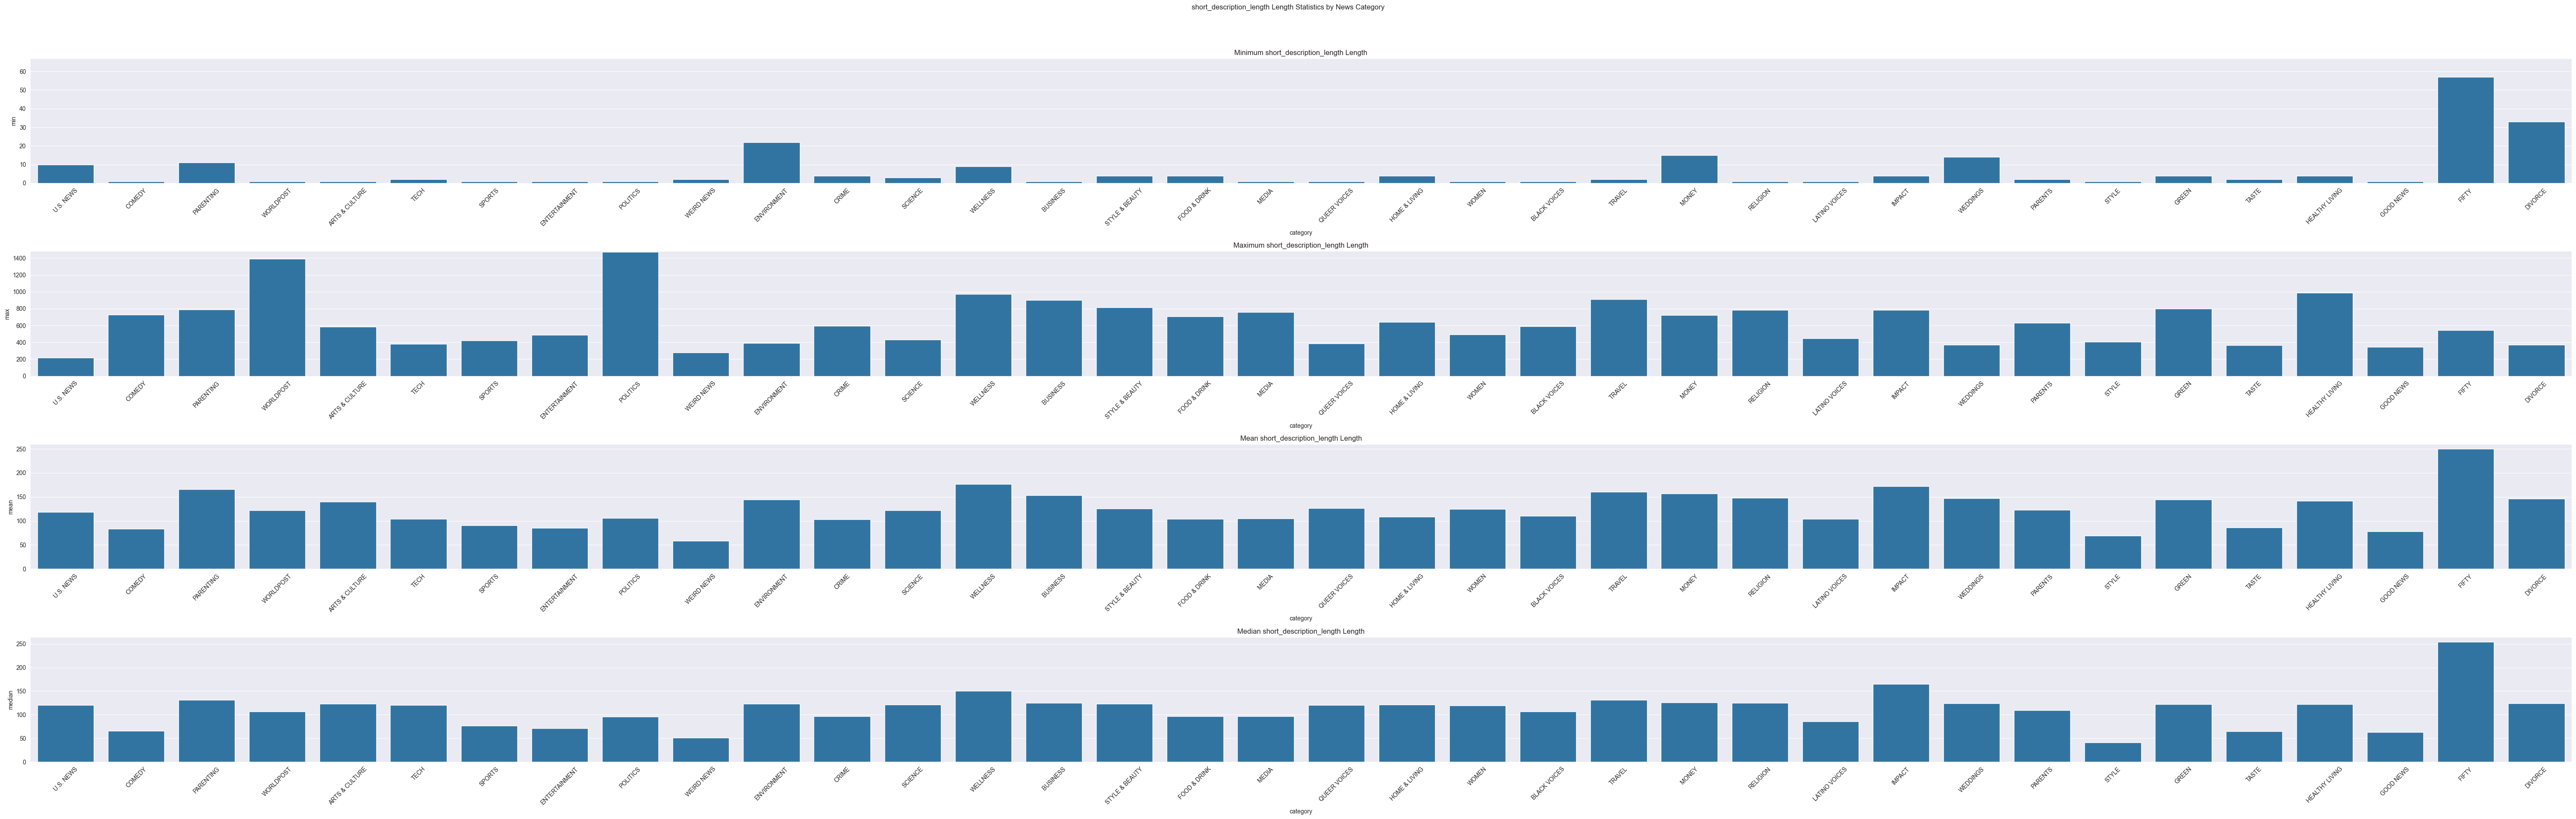

In [39]:
stats_for_feature('short_description_length')

In [40]:
news_df.drop(['headline_length', 'short_description_length'], axis=1, inplace=True)

In [41]:
author_category = news_df.groupby(['authors', 'category'])
print(author_category.size().head(10))
same_authors = news_df[news_df.duplicated(subset=['authors'], keep=False)]

same_authors_sorted = same_authors.sort_values(by=['authors'])

same_authors_sorted

authors                                                                                                    category      
 Basil Kreimendahl, Contributor\nPlaywright                                                                QUEER VOICES       1
 Bill Bigelow, ContributorRethinking Schools curriculum editor, Zinn Education Project c...                POLITICS           1
 Bustle, Contributor\nNews, entertainment, lifestyle site                                                  QUEER VOICES       1
                                                                                                           WEDDINGS           1
 Bustle, ContributorNews, entertainment, lifestyle site                                                    WOMEN              1
 Cristian Farias, Elise Foley, and Willa Frej                                                              POLITICS           1
 Jamie Walker, ContributorCEO and Founder of SweatGuru & Fit Approach                                      HEA

link  \
134947  https://www.huffingtonpost.com/entry/how-to-pl...   
138666  https://www.huffingtonpost.com/entry/ellen-pag...   
112529  https://www.huffingtonpost.com/entry/post_8771...   
119611  https://www.huffingtonpost.com/entry/running-a...   
131143  https://www.huffingtonpost.com/entry/group-fit...   
...                                                   ...   
107732  https://www.huffingtonpost.com/entry/will-the-...   
100450  https://www.huffingtonpost.com/entry/the-recon...   
112000  https://www.huffingtonpost.com/entry/the-trade...   
130626  https://www.huffingtonpost.com/entry/stress-te...   
101116  https://www.huffingtonpost.com/entry/the-battl...   

                                                 headline        category  \
134947  How to Plan a Feminist Wedding: 7 Ways to Say ...        WEDDINGS   
138666  Ellen Page Came Out as Gay, But Where Are Holl...    QUEER VOICES   
112529             The Best Stocking Stuffers for Runners  HEALTHY LIVING   
119611        10 Tips For Being A Better Running Teammate  HEALTHY LIVING   
131143  What's Better: Group Fitness Classes Or A Gym ...  HEALTHY LIVING   
...                                                   ...             ...   
107732  Will the United States End Up Like Greece? The...        BUSINESS   
100450  The Reconnection Agenda: The Fun and Easy Rout...        BUSINESS   
112000                        The Trade Agreement Pinatas        BUSINESS   
130626    Stress Test: The Indictment of Timothy Geithner        BUSINESS   
101116  The Battle Over the Trans-Pacific Partnership ...        BUSINESS   

                                        short_description  \
134947  While the big day is definitely something you ...   
138666  Perhaps the reason bi celebrities may be reluc...   
112529  As a runner myself, I understand what an inter...   
119611  Running has traditionally been a pretty solo s...   
131143  Choosing between a gym membership and group cl...   
...                                                   ...   
107732  For years people have been running around Wash...   
100450  Since I agree with the vast majority of what B...   
112000  Since many traditional Democratic constituenci...   
130626  Even if a bank had never officially employed G...   
101116  President Obama must be having trouble getting...   

                                                  authors       date  \
134947   Bustle, Contributor\nNews, entertainment, lif... 2014-04-03   
138666   Bustle, Contributor\nNews, entertainment, lif... 2014-02-22   
112529   Jamie Walker, ContributorCEO and Founder of S... 2014-12-17   
119611   Jamie Walker, ContributorCEO and Founder of S... 2014-09-27   
131143   Jamie Walker, ContributorCEO and Founder of S... 2014-05-18   
...                                                   ...        ...   
107732  딘 베이커, ContributorCo-director, CEPR; author, "... 2015-02-10   
100450  딘 베이커, ContributorCo-director, CEPR; author, "... 2015-05-06   
112000  딘 베이커, ContributorCo-director, CEPR; author, "... 2014-12-23   
130626  딘 베이커, ContributorCo-director, CEPR; author, "... 2014-05-24   
101116  딘 베이커, ContributorCo-director, CEPR; author, "... 2015-04-28   

        categoryId  
134947          27  
138666          18  
112529          32  
119611          32  
131143          32  
...            ...  
107732          14  
100450          14  
112000          14  
130626          14  
101116          14  

[171133 rows x 7 columns]

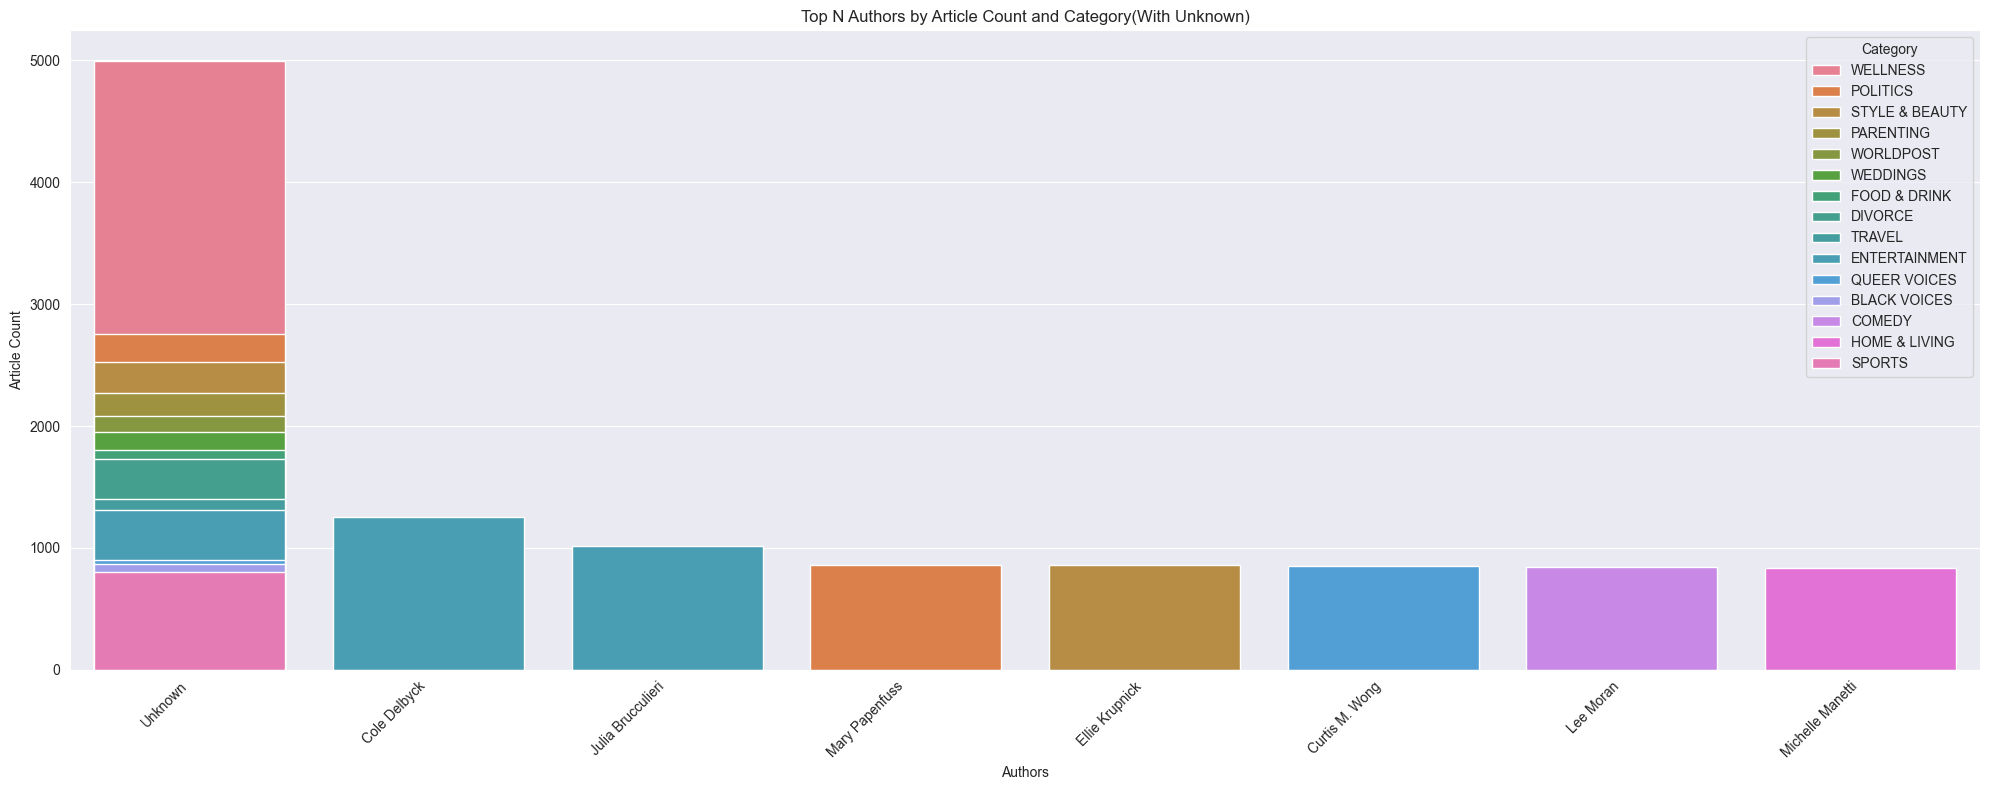

In [42]:
author_counts = news_df['authors'].value_counts()
top_n_authors_val = 20
top_n_author_category_counts = author_counts.head(top_n_authors_val)

author_category_counts = news_df.groupby(['authors', 'category']).size().reset_index(name='count')

top_n_author_category_counts = author_category_counts.sort_values('count', ascending=False).head(top_n_authors_val)

plt.figure(figsize=(20, 8))
sns.barplot(x='authors', y='count', hue='category', data=top_n_author_category_counts, dodge=False)
plt.title('Top N Authors by Article Count and Category(With Unknown)')
plt.xlabel('Authors')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()



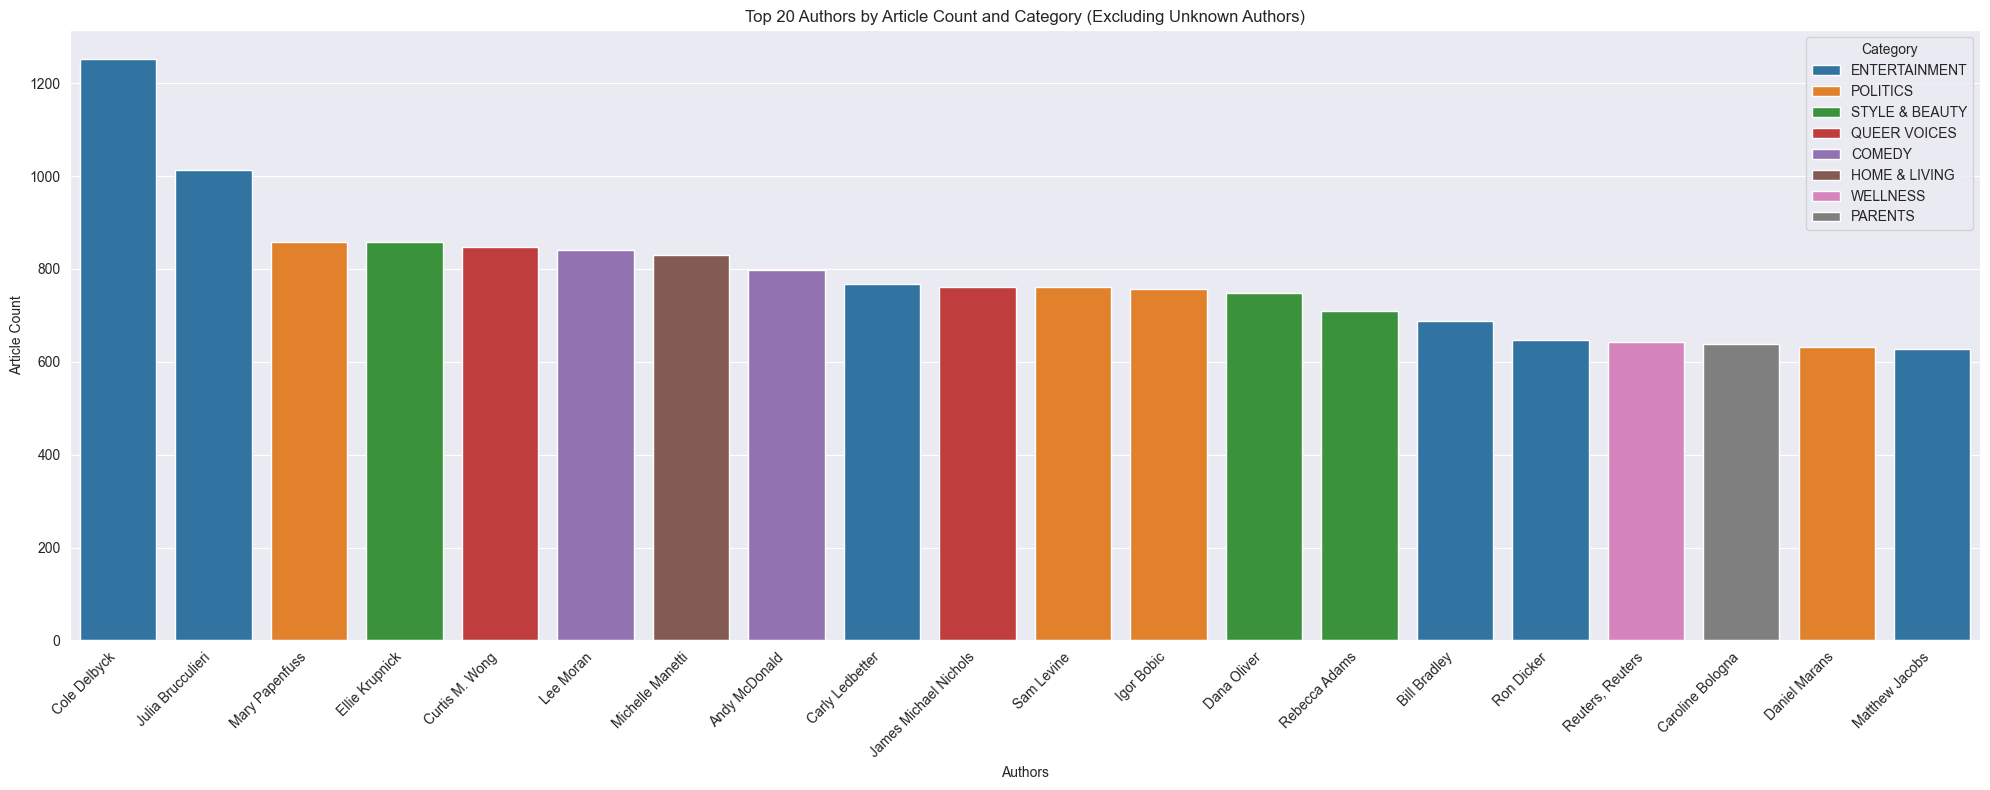

In [43]:
author_counts = news_df['authors'].value_counts()

top_n_authors_val = 20

author_category_counts = news_df.groupby(['authors', 'category']).size().reset_index(name='count')

# Exclude authors labeled as 'Unknown'
author_category_counts = author_category_counts[author_category_counts['authors'] != 'Unknown']

top_n_author_category_counts = author_category_counts.sort_values('count', ascending=False).head(top_n_authors_val)

plt.figure(figsize=(20, 8))
sns.barplot(x='authors', y='count', hue='category', data=top_n_author_category_counts, dodge=False)
plt.title(f'Top {top_n_authors_val} Authors by Article Count and Category (Excluding Unknown Authors)')
plt.xlabel('Authors')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

Open question.Link are acceptable.
Should we scrape the news article from the link and use it as a feature?

Visualizing Category Related Words with Word Clouds

In [44]:
def world_cloud_for_feature(category,feature_name):
    text = news_df[news_df['category'] == category]['headline'] + ' ' + news_df[news_df['category'] == category][feature_name]

    # Join all the text related to the category
    words = ' '.join(text)

    # Initialize the word cloud
    wordcloud_init = WordCloud(
        stopwords=STOPWORDS,
        background_color='white',
        width=800,
        height=400
    ).generate(words)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_init, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for the "{category}" Category'  f'"{feature_name}" Feature')
    plt.show()

Word Cloud for the "POLITICS" Category

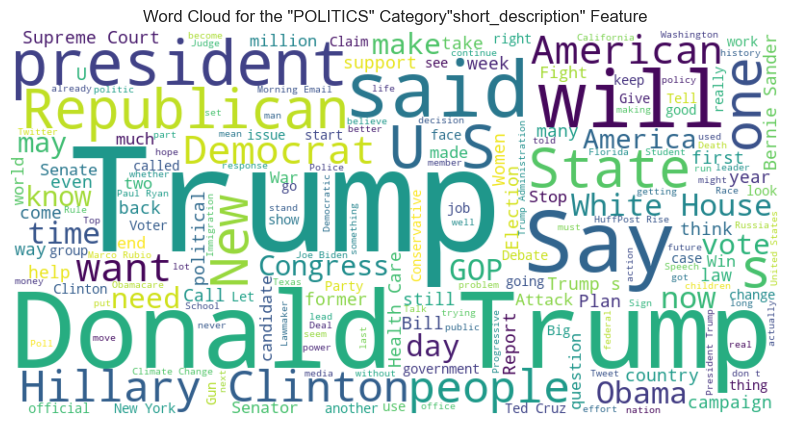

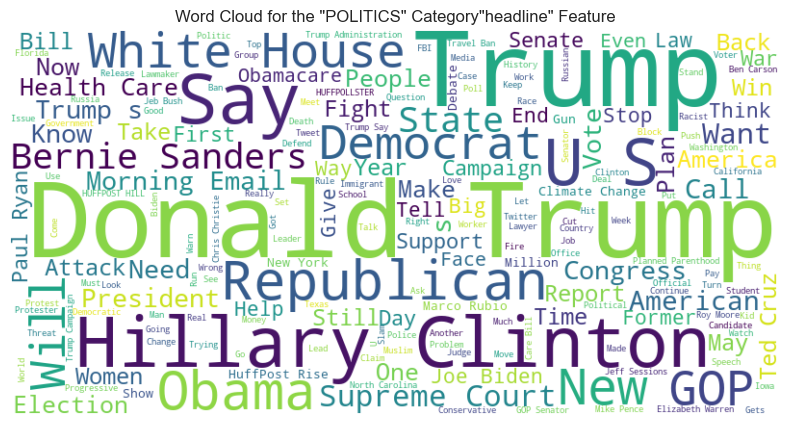

In [45]:
world_cloud_for_feature('POLITICS','short_description')
world_cloud_for_feature('POLITICS','headline')

Word Cloud for the "ENTERTAINMENT" Category

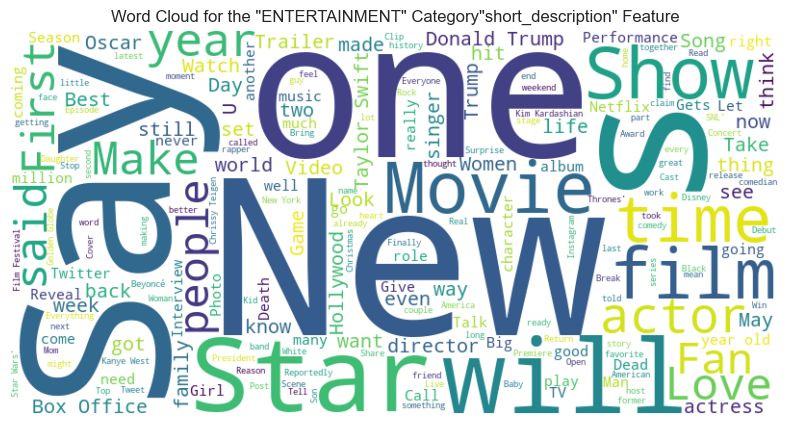

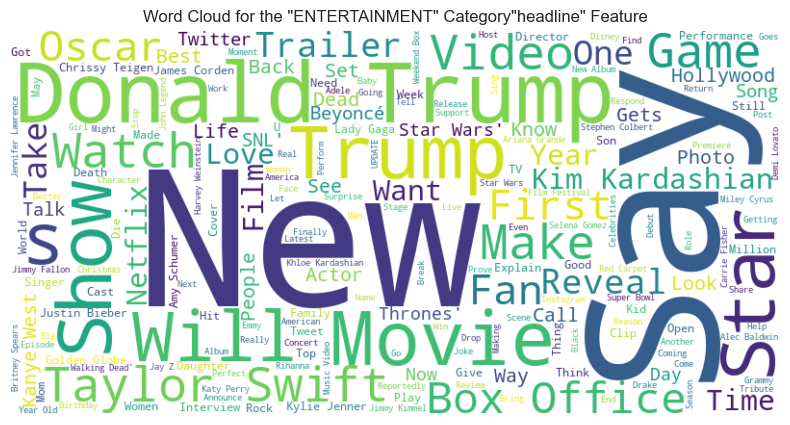

In [46]:
world_cloud_for_feature('ENTERTAINMENT','short_description')
world_cloud_for_feature('ENTERTAINMENT','headline')

Word Cloud for the "WELLNESS" Category

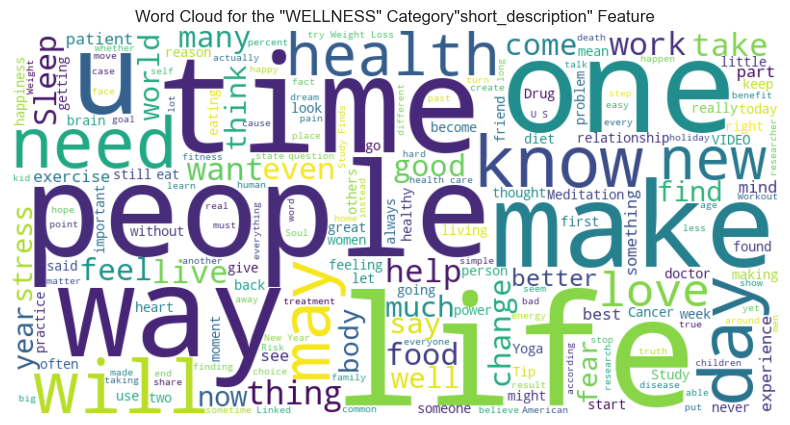

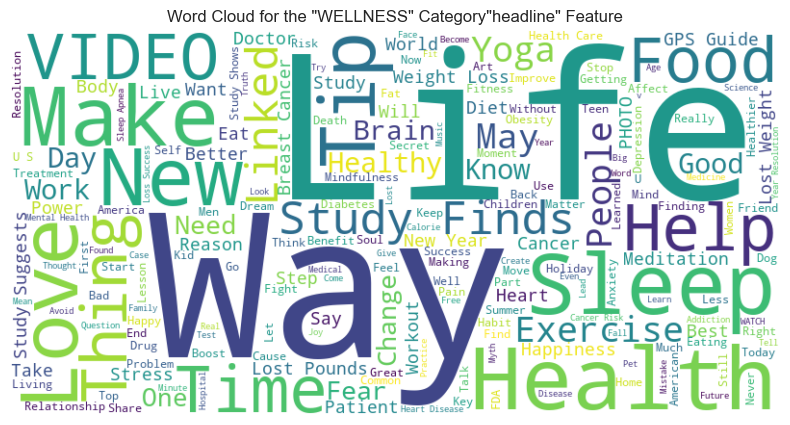

In [47]:
world_cloud_for_feature('WELLNESS','short_description')
world_cloud_for_feature('WELLNESS','headline')

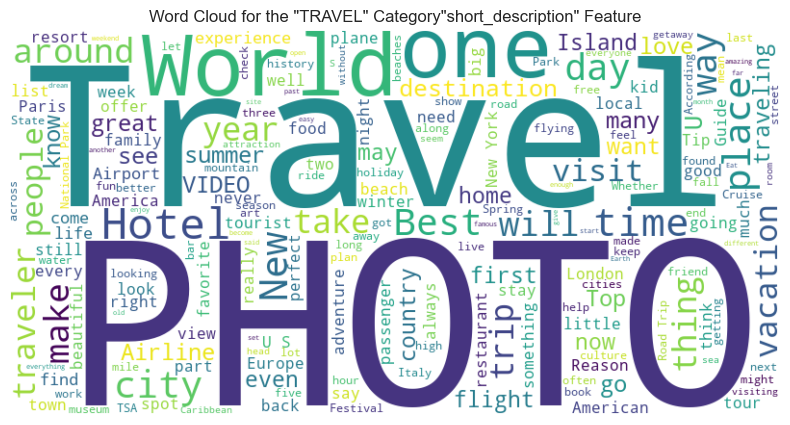

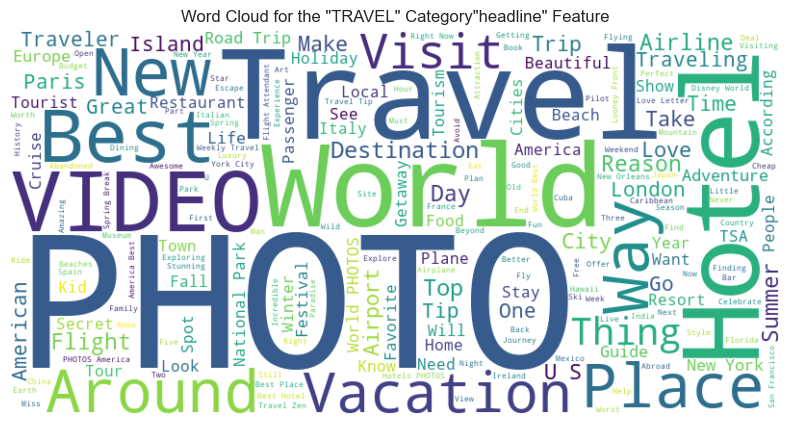

In [48]:
world_cloud_for_feature('TRAVEL','short_description')
world_cloud_for_feature('TRAVEL','headline')

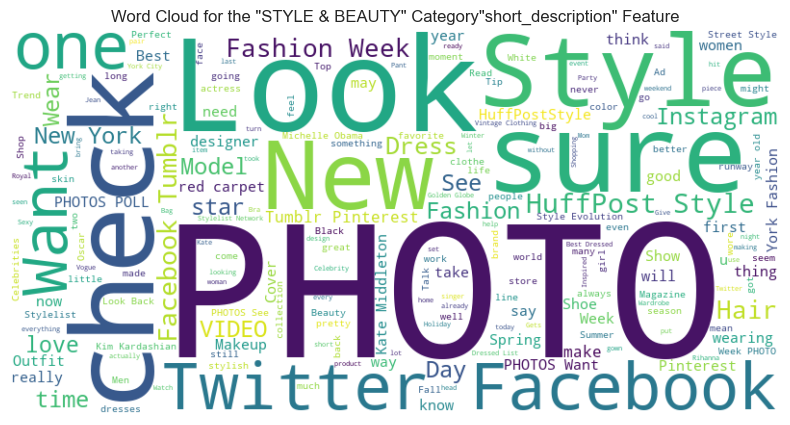

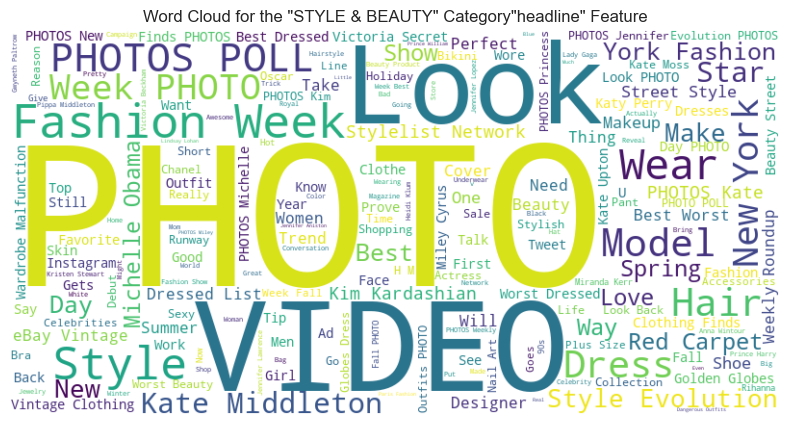

In [49]:
world_cloud_for_feature('STYLE & BEAUTY','short_description')
world_cloud_for_feature('STYLE & BEAUTY','headline')

Text Preprocessing

Remove HTML tags

In [50]:
def remove_tags(text):
    pattern = re.compile(r'<[^>]+>')  # Pattern to match HTML tags
    return re.sub(pattern, '', text)

Remove special characters(alphanumeric)

In [51]:
def remove_special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews

In [52]:
def convert_lower(text):
    return text.lower()

In [53]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

In [54]:
def stemming(text):
    stemmer = PorterStemmer()
    reviews = ''
    for x in text:
        reviews = reviews + stemmer.stem(x) + ' '
    return reviews

In [55]:
def lemmatization(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])

In [56]:
def trim_text(text):
    return text.strip()

Text Aggregation

In [57]:
def preprocess_text(df,text_fields = None):
    if text_fields is None:
        text_fields = ['headline', 'short_description']
    for text_field in text_fields:
        df[text_field] = (df[text_field]
                          .apply(remove_tags) 
                          .apply(remove_special_char)
                          .apply(convert_lower)
                          .apply(trim_text)
                          .apply(remove_stopwords)
                          .apply(lemmatization)
                          )
    return df

In [58]:
preprocessed_df = preprocess_text(news_df)

In [59]:
preprocessed_df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  4 million american roll sleeve omicron targete...  U.S. NEWS   
1  american airline flyer charged banned life pun...  U.S. NEWS   
2          23 funniest tweet cat dog week sept 17 23     COMEDY   
3              funniest tweet parent week sept 17 23  PARENTING   
4  woman called cop black bird watcher loses laws...  U.S. NEWS   

                                   short_description               authors  \
0  health expert said early predict whether deman...  Carla K. Johnson, AP   
1  subdued passenger crew fled back aircraft conf...        Mary Papenfuss   
2                         dog understand could eaten         Elyse Wanshel   
3  accidentally put grown toothpaste toddler toot...      Caroline Bologna   
4  amy cooper accused investment firm franklin te...        Nina Golgowski   

        date  categoryId  
0 2022-09-23           0  
1 2022-09-23           0  
2 2022-09-23           1  
3 2022-09-23           2  
4 2022-09-22           0

In [60]:
def text_aggregation(df, separator=' <|> '):
    # Applying the logic to each row using a lambda function
    df['author_maybe'] = df['authors'].apply(lambda x: '' if x == 'Unknown' else x)

    # Combining the text columns into a single column
    df['text'] = df['headline'] + separator + df['short_description'] + separator + df['author_maybe']

    # Dropping the temporary column 'author_maybe'
    df.drop(columns=['author_maybe'], inplace=True)

    return df

In [61]:
news_df_aggregated = text_aggregation(news_df)

In [62]:
news_df_aggregated.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  4 million american roll sleeve omicron targete...  U.S. NEWS   
1  american airline flyer charged banned life pun...  U.S. NEWS   
2          23 funniest tweet cat dog week sept 17 23     COMEDY   
3              funniest tweet parent week sept 17 23  PARENTING   
4  woman called cop black bird watcher loses laws...  U.S. NEWS   

                                   short_description               authors  \
0  health expert said early predict whether deman...  Carla K. Johnson, AP   
1  subdued passenger crew fled back aircraft conf...        Mary Papenfuss   
2                         dog understand could eaten         Elyse Wanshel   
3  accidentally put grown toothpaste toddler toot...      Caroline Bologna   
4  amy cooper accused investment firm franklin te...        Nina Golgowski   

        date  categoryId                                               text  
0 2022-09-23           0  4 million american roll sleeve omicron targete...  
1 2022-09-23           0  american airline flyer charged banned life pun...  
2 2022-09-23           1  23 funniest tweet cat dog week sept 17 23 <|> ...  
3 2022-09-23           2  funniest tweet parent week sept 17 23 <|> acci...  
4 2022-09-22           0  woman called cop black bird watcher loses laws...

In [63]:
news_df_aggregated['text'][1]

'american airline flyer charged banned life punching flight attendant video <|> subdued passenger crew fled back aircraft confrontation according u attorney office los angeles <|> Mary Papenfuss'

Feature selection: Create and Fit Bag of Words Model

In [148]:
n_features_bow = 100000 # the number of feature to feed bow
#n_rows_bow = 10000 # max rows to train the model faster
n_rows_bow = news_df_aggregated.shape[0] # max rows to train the model faster
news_df_subset = news_df_aggregated.iloc[:n_rows_bow]
x_val = news_df_subset['text'].values
y_val = news_df_subset['categoryId'].values
cv = CountVectorizer(max_features=n_features_bow)
x_bag_of_words = cv.fit_transform(x_val)
print("X.shape = ",x_bag_of_words.shape)
print("y.shape = ",y_val.shape)

X.shape =  (187978, 95301)
y.shape =  (187978,)


In [123]:
def stratified_train_test_split(X_in, y_in, test_size=0.3, random_state=42):
    x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(
        X_in, 
        y_in, 
        test_size=test_size, 
        random_state=random_state,
        shuffle=True, 
        stratify=y_in
    )
    
    return x_train_s, x_test_s, y_train_s, y_test_s

In [143]:
x_train, x_test, y_train, y_test = stratified_train_test_split(x_bag_of_words, y_val)
print(x_train.shape)
print(x_test.shape)

(131584, 30000)
(56394, 30000)


In [125]:
class TrainTestSplitResult:
    def __init__(self,x_train_p, x_test_p, y_train_p, y_test_p):
        self.x_train = x_train_p
        self.x_test = x_test_p
        self.y_train = y_train_p
        self.y_test = y_test_p
    

In [80]:
perform_list_bow = [ ]

In [126]:
def get_model(model_name):
    mdl = None
    is_multi_class_inherent = True
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
        is_multi_class_inherent = False
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy', random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
        is_multi_class_inherent = False
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' ,p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
        is_multi_class_inherent = False
    if mdl is None:
        print('Model not found')
        return None, is_multi_class_inherent
    return mdl, is_multi_class_inherent

def run_model(model_name, path_to_save='cached_models/', perform_list=None, train_test_split_result: TrainTestSplitResult=None):
    if perform_list is None:
        perform_list = []
    model_file_name = f'{path_to_save}/{model_name.replace(" ", "_")}_model.pkl'
    if os.path.exists(model_file_name):
        print(f'Loading cached {model_name} model...')
        with open(model_file_name, 'rb') as file:
            model = pickle.load(file)
    else:
        mdl, is_multi_class_inherent = get_model(model_name)
        if mdl is None:
            return
        if is_multi_class_inherent:
            model = mdl
        else:
            model = OneVsRestClassifier(mdl)
        model.fit(train_test_split_result.x_train, train_test_split_result.y_train)
        with open(model_file_name, 'wb') as file:
            print(f'Caching {model_name} model...')
            pickle.dump(model, file)
    y_pred = model.predict(train_test_split_result.x_test)
    # Performance metrics
    accuracy = round(accuracy_score(train_test_split_result.y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(train_test_split_result.y_test, y_pred, average='micro')
    # classification report
    report = classification_report(train_test_split_result.y_test, y_pred, zero_division=1)
    
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    print(report)
    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2)),
        ('Report', report)
    ]))

In [144]:
train_test_result = TrainTestSplitResult(x_train, x_test, y_train, y_test)

In [146]:
run_model('Logistic Regression','cached_models/bow', perform_list_bow,train_test_result)

Caching Logistic Regression model...
Test Accuracy Score of Basic Logistic Regression: % 75.05
Precision : 0.7504521757633791
Recall : 0.7504521757633791
F1-score : 0.7504521757633791
              precision    recall  f1-score   support

           0       0.45      0.22      0.30       413
           1       0.69      0.67      0.68      1393
           2       0.73      0.78      0.75      2637
           3       0.71      0.72      0.71      2461
           4       0.79      0.68      0.74       979
           5       0.71      0.64      0.67       630
           6       0.76      0.77      0.76      1324
           7       0.75      0.80      0.78      4432
           8       0.78      0.88      0.83      9732
           9       0.50      0.54      0.52       695
          10       0.60      0.45      0.52       432
          11       0.58      0.57      0.57       850
          12       0.70      0.55      0.62       541
          13       0.77      0.88      0.82      5382
     

In [113]:
run_model('Random Forest','cached_models/bow', perform_list_bow, train_test_result)

Caching Random Forest model...
Test Accuracy Score of Basic Random Forest: % 62.83
Precision : 0.6283333333333333
Recall : 0.6283333333333333
F1-score : 0.6283333333333333
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       413
           1       0.72      0.55      0.62        97
           2       0.82      0.79      0.81        34
           3       0.64      0.57      0.60       358
           4       1.00      0.00      0.00        13
           5       1.00      0.00      0.00        12
           6       0.86      0.10      0.17        63
           7       0.64      0.78      0.70       481
           8       0.62      0.92      0.74      1009
           9       0.75      0.14      0.24        43
          10       1.00      0.00      0.00        36
          11       1.00      0.00      0.00        58
          12       1.00      0.00      0.00        10
          13       0.90      0.51      0.65        35
          14     

In [98]:
run_model('Multinomial Naive Bayes','cached_models/bow', perform_list_bow, train_test_result)

Caching Multinomial Naive Bayes model...
Test Accuracy Score of Basic Multinomial Naive Bayes: % 63.27
Precision : 0.6326666666666667
Recall : 0.6326666666666667
F1-score : 0.6326666666666667
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       413
           1       0.54      0.80      0.64        97
           2       0.68      0.68      0.68        34
           3       0.65      0.68      0.66       358
           4       0.50      0.15      0.24        13
           5       0.12      0.08      0.10        12
           6       0.56      0.48      0.51        63
           7       0.70      0.70      0.70       481
           8       0.83      0.75      0.79      1009
           9       0.31      0.26      0.28        43
          10       0.31      0.39      0.35        36
          11       0.22      0.38      0.28        58
          12       0.00      0.00      0.00        10
          13       0.50      0.77      0.61        

In [99]:
run_model('Support Vector Classifer','cached_models/bow', perform_list_bow, train_test_result)

Caching Support Vector Classifer model...
Test Accuracy Score of Basic Support Vector Classifer: % 65.7
Precision : 0.657
Recall : 0.657
F1-score : 0.657
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       413
           1       0.65      0.55      0.60        97
           2       0.78      0.74      0.76        34
           3       0.61      0.70      0.65       358
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        12
           6       0.65      0.21      0.31        63
           7       0.65      0.80      0.72       481
           8       0.72      0.91      0.80      1009
           9       0.60      0.14      0.23        43
          10       0.71      0.14      0.23        36
          11       0.33      0.02      0.03        58
          12       1.00      0.00      0.00        10
          13       0.75      0.60      0.67        35
          14       1.00      0.10  

In [ ]:
run_model('Decision Tree Classifier','cached_models/bow', perform_list_bow, train_test_result)

In [ ]:
run_model('K Nearest Neighbour','cached_models/bow', perform_list_bow, train_test_result)

In [ ]:
run_model('Gaussian Naive Bayes','cached_models/bow', perform_list_bow, train_test_result)

In [129]:
print(f'Bow models performance :{perform_list_bow}')

Bow performance :[{'Model': 'Logistic Regression', 'Test Accuracy': 64.67, 'Precision': 0.65, 'Recall': 0.65, 'F1': 0.65}, {'Model': 'Logistic Regression', 'Test Accuracy': 64.67, 'Precision': 0.65, 'Recall': 0.65, 'F1': 0.65}, {'Model': 'Random Forest', 'Test Accuracy': 66.4, 'Precision': 0.66, 'Recall': 0.66, 'F1': 0.66}, {'Model': 'Logistic Regression', 'Test Accuracy': 64.67, 'Precision': 0.65, 'Recall': 0.65, 'F1': 0.65}, {'Model': 'Random Forest', 'Test Accuracy': 66.4, 'Precision': 0.66, 'Recall': 0.66, 'F1': 0.66}, {'Model': 'Multinomial Naive Bayes', 'Test Accuracy': 65.3, 'Precision': 0.65, 'Recall': 0.65, 'F1': 0.65}, {'Model': 'Support Vector Classifer', 'Test Accuracy': 65.7, 'Precision': 0.66, 'Recall': 0.66, 'F1': 0.66}, {'Model': 'Logistic Regression', 'Test Accuracy': 64.67, 'Precision': 0.65, 'Recall': 0.65, 'F1': 0.65, 'Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.53      0.50       413\n           1       0.70    

Feature selection: TF-IDF

In [130]:
perform_list_tfidf = []

In [153]:
n_features_tfidf = 100000
#n_rows = 10000
n_rows = news_df_aggregated.shape[0]
news_df_subset = news_df_aggregated.iloc[:n_rows]
X_train, X_test, y_train, y_test = train_test_split(news_df_subset['text'], news_df_subset['categoryId'], test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=n_features_tfidf, ngram_range=(1, 2), sublinear_tf=True)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [154]:
train_test_result_tfidf = TrainTestSplitResult(X_train, X_test, y_train, y_test)

In [ ]:
run_model('Logistic Regression','cached_models/tfidf',perform_list_tfidf, train_test_result_tfidf)

In [140]:
run_model('Random Forest','cached_models/tfidf',perform_list_tfidf, train_test_result_tfidf)

KeyboardInterrupt: 

In [ ]:
run_model('Multinomial Naive Bayes','cached_models/tfidf',perform_list_tfidf, train_test_result_tfidf)

In [ ]:
run_model('Support Vector Classifer','cached_models/tfidf', perform_list_tfidf, train_test_result_tfidf)

In [ ]:
run_model('Decision Tree Classifier','cached_models/tfidf', perform_list_tfidf, train_test_result_tfidf)

In [ ]:
run_model('K Nearest Neighbour','cached_models/tfidf', perform_list_tfidf, train_test_result_tfidf)

In [ ]:
print(f'TFIDF models performance :{perform_list_tfidf}')